이전 5강에서는 회귀에 대해 다뤘고 현재 챕터에선 분류 문제를 다룬다.

회귀 문제는 목표 데이터가 연속된 수치였지만, 분류 문제에서 목표 데이터는 '클래스'이다.

클래스는 정수에 대칭하여 class의 이름을 사용할 수 있지만, 순서는 딱히 상관은 없다.

그리고 또한 해당 챕터에선 확률의 개념에 대해 도입하며, class마다의 확률을 출력하는 함수를 고려하며, 예측의 '불확실성'을 정량적으로 다룰 수 있게 된다.

또환 분류는 목표 데이터가 비연속적인 class(비선형)인것이며 카테고리 분류의 경우로 예를 들 수 있다.

ex) 몸무게와 키 정보(input)을 이용하여 저체중과 정상체중, 과체중을 구분하는것.

## 6.1 1차원 입력 2클래스 분류

Xn = 1차원의 '입력 변수'

Tn = 목표 변수 (클래스, 카테고리, 라벨)

n  = 데이터의 인덱스



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 생성
np.random.seed(seed=0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) #입력데이터
T = np.zeros(X_n, dtype = np.uint8)
Dist_s = [0.4, 0.8]
Dist_w = [0.8, 1.6]
Pi = 0.5
for n in range(X_n):
  wk = np.random.rand()
  T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)
  X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]

print('X = '+ str(np.round(X,2)))
print('T = '+ str(T))

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


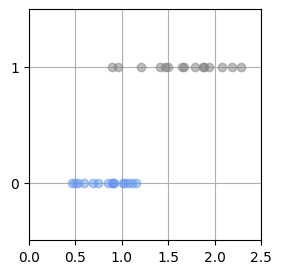

In [ ]:
# 데이터 분포 표시
def show_data1(x,t):
  K = np.max(t) + 1
  for k in range(K):
    plt.plot(x[t == k ], t[t == k], X_col[k], alpha = 0.5,
             linestyle = 'none', marker= 'o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])

fig = plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()

k = 0 -> t ==0일 때 x와 t만을 추출하여 플롯하는 명령이다.

x[t == 0]을 사용하면 t == 0을 채우는 요소 번호 x가 추출된다.

여기서 분류로 문제를 푸는 법은 데이터에서 파란색과 검은색을 분리하는 경계선을 결정하는 것이다.

이것을 결정경계라고 하며, 결정 경계가 정해지면 새로운 질량 데이터가 결정 경계보다 작으면 '암컷'(파란색)으로 예상하며, 크다면 '수컷'(검은색)으로 예측할 수 있다.

--> 분류문제에서 선형 회귀 모델로 문제를 풀경우

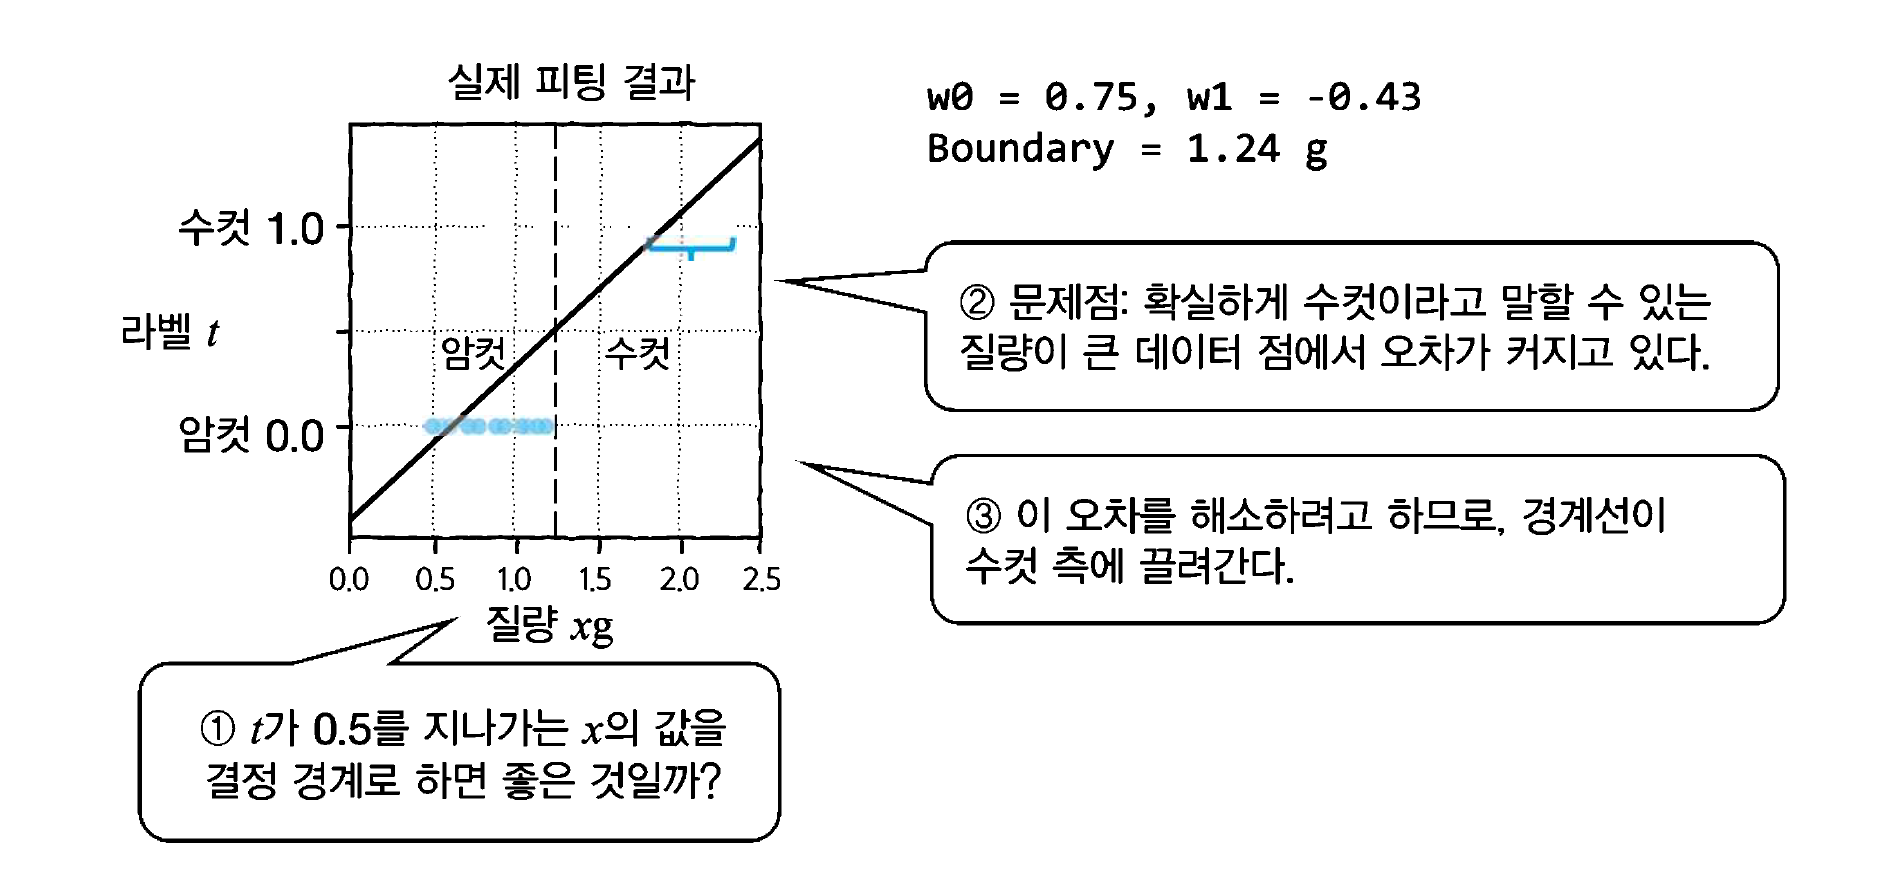

 - 6.1.2 확률로 나타내는 클래스 분류

 전체 데이터에 대해 나누어지는 실제 분포 정보에서의 해석적인 방법을 통해 조건부 확률을 활용하여 아래와같은 식으로 나타낼 수 있다

 $$P(t = 1 | x)$$



 - 6.1.3 최대가능도법

가능도(우도)는 주어진 데이터 집합이 발생할 확률이다.

실제 분포 정보에서의 해석적인 방법이 아닌 데이터로부터 추정해야한다.

0.8 < x <= 1.2 범위일 때, 처음 3회는 t=0이며, 4회째는 t=1일 때, 위의 식으로 추정을 해본다면 w = 1/4가 되지만, 다른 모델의 경우에도 대응할 수 잇도록 최대 가능도법을 통해 구한다.

ex) w가 0.1일 경우 가능도 -> t = 1이 될 확률 0.1, t = 0이 될 확률 0.9 -> T가 0, 0, 0, 1이 될 확률 -> 0.9 x 0.9 x 0.9 x 0.1 = 0.0729

ex) w가 0.2일 경우 가능도 -> t = 1이 될 확률 0.2, t = 0이 될 확률 0.8 -> T가 0, 0, 0, 1이 될 확률 -> 0.8 x 0.8 x 0.8 x 0.2 = 0.1024



식으로 나타냈을 때, 아래와 같음

$$ P(T = 0,0,0,1 |x) = (1-w)^3w $$

여기서 그럼 최대치를 갖는 w는?

$$logP = log{(1-w)^3w}=3log(1-w)+logw$$

로그 가능도라고도 불리며, 평균 제곱 오차 함수에서는 이를 최소하하는 매개 변수를 찾았지만, 로그 가능도의 경우는 최대화하는 매개 변수를 찾게 된다.

$$\frac{\partial }{\partial W}logP = \frac{\partial }{\partial W}[3log(1-w) +logw] = 0$$

$$3\frac{-1}{1-w}logP + \frac{1 }{w} = 0$$

$$\frac{-3w + 1 - w}{(1-w) w} = 0$$

$$w = \frac{1}{4}$$

- 6.1.4 로지스틱 회귀 모델

데이터의 분포가 고르지 않을 경우, 로지스틱 회귀 모델을 사용할 수 있다.

시그모이드 함수안에 일반적인 직선모델을 넣은 식으로 표현 될 수 있다.

$$ y= w_0x+w_1 $$

$$ y = a(w_0x + w_1) = \frac{1}{1 + exp{-(w_0x + w_1)}} $$

1.25

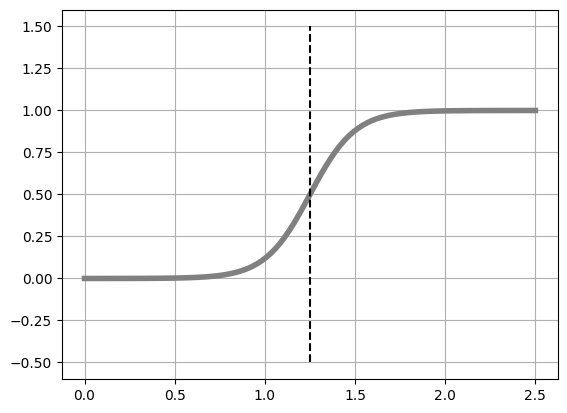

In [ ]:
# 리스트

def logistic(x,w):
  y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
  return y

def show_logistic(w):
  xb = np.linspace(X_min, X_max, 100)
  y = logistic(xb, w)
  plt.plot(xb, y, color='gray', linewidth=4)
  i = np.min(np.where(y > 0.5))
  B = (xb[i-1] + xb[i]) / 2
  plt.plot([B,B], [-.5, 1.5], color='k', linestyle= '--')
  plt.grid(True)
  return B

# 테스트
W = [8, -10]
show_logistic(W)

- 6.1.5 교차 엔트로피 오차



교차 엔트로피 오차란, 데이터의 T의 가능도를 모두 더하는 오차계산법이다.

실제 X에 대한 데이터 T는 정답 클래스외엔 0으로 표시하므로 정답클래스에 대해 모델이 예측한 확률을 모으기 때문에 값이 최대가 될수록 좋다.

평균 제곱오차처럼 최소를 구하기 위해 -1을 곱하여 사용한다.



로지스틱 회귀모델을 통해 x가 t=1이 될 확률을 다음과 같이 나타낼수있다.


$$y=σ(w_0x +w_1)=P(t=1|x)$$

매개변수 w0과 w1이 데이터에 맞도록 MLE(최대우도)법을 활용한다.(데이터가 생성될 가능성이 확률적으로 가장 높은 매개 변수를 구한다는 방침)

생성 확률이 t값에 의해 y나 1-y로 변해 버릴때,

$$P(t = 1|x) = y^t(1-y)^{1-t} = y$$

t=1일 때,
$$P(t = 1|x) = y^1(1-y)^{1-1}= y$$

t=0일 때, 아래와 같이 되며 지수를 스위치처럼 바꿔가며 사용이 가능하다.

$$P(t = 0|x) = y^0(1-y)^{1-0}= 1-y$$
<br/><br/>

결론적으로 데이터가 N개일 경우 주어진 X에 대한 클래스 T의 생성확률은 아래와 같다.

(하나하나의 데이터 생성확률은 모든 데이터에 곱하면 된다.)

$$P(T|X) = \prod_{n=0}^{n-1} P(t_n|x_n)=\prod_{n=0}^{n-1} y_n^{t_n}(1-y_n)^{1-t_n}$$

위 식에서 대수를 취하고, 로그 가능도를 얻으며, 매개변수는 w0,w1이 로그 가능도가 최대가 되도록 구한다.

아래는 위의 식의 변형이다.

$$logP(T|X) =\displaystyle\sum_{n=0}^{N-1} {t_nlogy_n +(1-t_n)log(1-y_n)}$$



이전 장까지는 MSE(평균제곱오차)가 최소가 되도록 매개변수를 구하고 있었음으로 그것과 마추기 위해 -1 을 곱함

이를 교차엔트로피오차(cross-entorpy-error)CEE라고 한다.

MSE와 마찬가지로 오차가 '최소'가 되는 매개변수를 구하면 된다.

그리고 교차 엔트로피를 N으로 나눈 '평균 교차 엔트로피 오차'를 E(w)로 정의하며, 이를 통해 데이터 갯수에 오차 값이 영항을 받기 어렵게 되며, 수치를 확인하기 편하게 된다.

$$E(w)= -\frac{1}{N}logP(T|X)=-\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}         [t_nlogy_n + (1-t_n)log(1-y_n)]$$


In [ ]:
# E(w) 평균 교차 엔트로피 오차

def cee_logistic(w, x ,t):
  y = logistic(x, w)
  cee = 0
  for n in range(len(y)):
    cee = cee - (t[n] * np.log(y[n]) + (1 - t[n])* np.log(1 - y[n]))

  cee = cee/X_n
  return cee


# test
W = [1,1]
cee_logistic(W, X, T)

1.0288191541851066

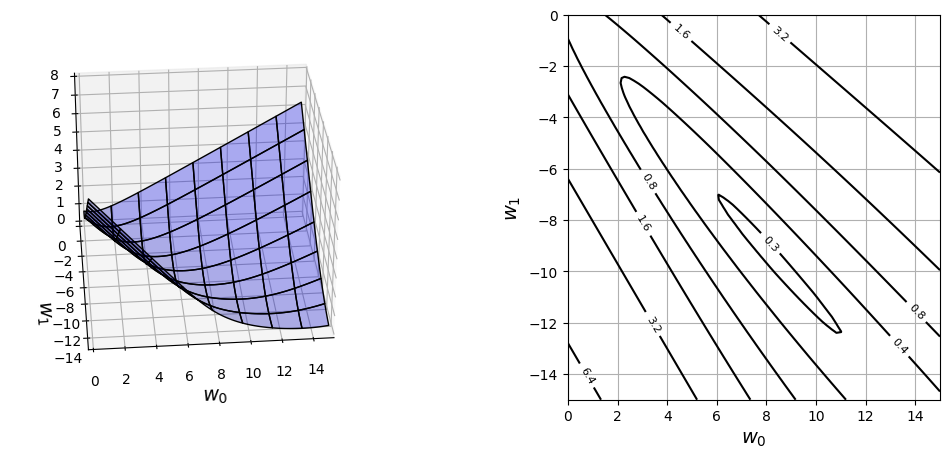

In [ ]:
# E(w)의 모양에 대해 확인

from mpl_toolkits.mplot3d import Axes3D

# 등고선 표시 해상도
xn = 80
w_range = np.array([[0,15], [-15,0]])
x0 = np.linspace(w_range[0,0], w_range[0,1], xn)
x1 = np.linspace(w_range[1,0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
  for i1 in range(xn):
    w[0] = x0[i0]
    w[1] = x1[i1]
    C[i1, i0] = cee_logistic(w, X, T)

# 표시

plt.figure(figsize = (12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1,C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt="%1.1f", fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

위의 그래프로 보면 대각선의 모서리가 들어올려지는 모양을 하고있다.

여기서 보면 최소치는 w0 = 9, w1 = -9의 근처에 있을 것으로 확인된다.

- 6.1.6 학습 규칙의 도출

이전과는 다르게 해석해적으로 접근은 힘들 수 있다.

교차 엔트로피 오차를 최소화하는 매개변수는 y_n이 비선형의 시그모이드 함수를 포함하고 있기 때문이다.

그렇기에 경사 하강법을 사용하여 수치적으로 구하는 것을 고려한다.

이전과 같이 평균 교차 엔트로피 오차를 w0로 편미분한 것을 구해보자.



$$E(W) = \frac{1}{N}\sum_{n=0}^{N-1} E_n(w) = -t_nlogy_n - (1-t_n)log(1-y_n)$$

여기서 w_0에 대해 편미분을 하면 아래와 같이표현된다.

$$\frac{\partial }{\partial w_0}E(w) = \frac{1}{N}\frac{\partial }{\partial w_0}\sum_{n=0}^{N-1} E_n(w) = \frac{1}{N}\sum_{n=0}^{N-1}\frac{\partial }{\partial w_0} E_n(w) $$


이후의 계산을 위해 시그모이드 함수의 내용 w_0x_n + w_1를 a_n으로 표시하면 아래와 같이 표시가 가능하며 a_n을 입력총합이라고 부르기로한다.

$$y_n = σ(a_n) = \frac{1}{1+exp(-a_n)} $$

$$ a_n = w_0x_n + w_1 $$

여기서 E_n(w)은 E_n(y_n(a_n(w)))로 중첩된 함수로 해석할 수 있음으로 w_0으로 편미분하기 위해 연쇄 법칙의 공식(직렬 중첩)을 사용한다.

$$ \frac{\partial E_n}{\partial w_0} = \frac{\partial E_n}{\partial y_0} ⋅ \frac{\partial y_n}{\partial a_n} ⋅ \frac{\partial a_n}{\partial w_0}$$

$$E(W) = -t_nlogy_n - (1-t_n)log(1-y_n)$$

위 식의 첫번째 부분에 y_n으로 편미분하고 y_n에 대해 정리한 후 log법칙을 활용하면 아래의 식을 도출할 수 있다.

$$ \frac{\partial E_n}{\partial w_0} = -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n} $$

또한 우변의 두 번째 부분에서 시그모이드 함수의 미분 공식을 사용하고, σ(a_n)를 y_n으로 되돌림.

$$ \frac{\partial y_n}{\partial a_0} = \frac{\partial}{\partial a_n}σ(a_n) = σ(a_n){1- σ(a_n)} = y_n(1 - y_n) $$

마지막 세번째 부분은 아래와 같다

$$ \frac{\partial a_n}{\partial w_0} = \frac{\partial}{\partial w_0}(w_0x_n + w_1) = x_n $$

결과적인 식은 아래와 같다

$$ \frac{\partial E_n}{\partial w_0} = (-\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n})y_n(1-y_n)x_n = (-t_n(1 - y_n) + (1-t_n)y_n)x_n = (y_n - t_n)x_n$$

결과적으로 w_1에 관한 편미분을 구하면 아래와 같다.

$$ \frac{\partial E}{\partial w_1} = \frac{1}{N}\sum_{n=0}^{N=1}(y_n - t_n) $$

In [ ]:
# 평균 교차 엔트로피 오차의 미분

def dcee_logistic(w,x,t):
  y = logistic(x,w)
  dcee = np.zeros(2)
  for n in range(len(y)):
    dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
    dcee[1] = dcee[1] + (y[n] - t[n])

  dcee = dcee / X_n

  return dcee

# test

W = [1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


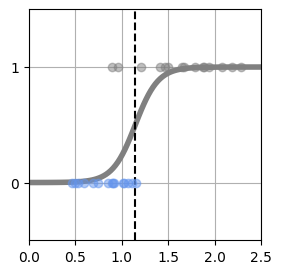

In [ ]:
# 경사 하강법
# scipy의 내부에서 자동적으로 설정해주는 방법을 활용


from scipy.optimize import minimize

def fit_logistic(w_init, x, t):
  res1 = minimize(cee_logistic, w_init, args=(x,t),
                  jac = dcee_logistic, method="CG")

  return res1.x

# 메인

plt.figure(1, figsize=(3,3))
W_init = [1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0],W[1]))
B = show_logistic(W)
show_data1(X,T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X ,T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

위의 그래프는 켤레 기울기법이라는 경사 하강법의 일종을 지정하며, 직선 모델을 제곱 오차 최소화로 피팅했을 때의 결정 경계보다 약간 왼쪽으로 보이는 현상이 있다.

이 모델의 가장 큰 장점은 출력 값이 조건부 확률을 근사하려는 점이며, 모호성을 포함하여 예측한다.

- 켤레 기울기법
: 대칭인 양의 준정 부호행렬을 갖는 선형계의 해를 구하는 수치 알고리즘이다.

## 6.2 2차원 입력 2클래스 분류

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 2차원일때를 확인해봄

# 데이터 생성

np.random.seed(seed=1)
N = 100
K = 3
T3 = np.zeros((N,3), dtype=np.uint8)
T2 = np.zeros((N,2), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
# 분포의 중심
Mu = np.array([[-.5, -.5], [.5, 1.0], [1,-.5] ])
# 분포의 분산
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T3[n, k] = 1
      break
  for k in range(2):
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1,k] + Mu[T3[n, :] == 1,k])

T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:,2]

In [ ]:
# 입력데이터 X의 첫 5개
print(X[:5, :])

# 클래스 데이터 T2의 처음 5개
print(T2[:5, :])

# 클래스 데이터 T3의 처음 5개
# 클래스 1,0,0,1,0에 속해 있다는 의미
print(T3[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


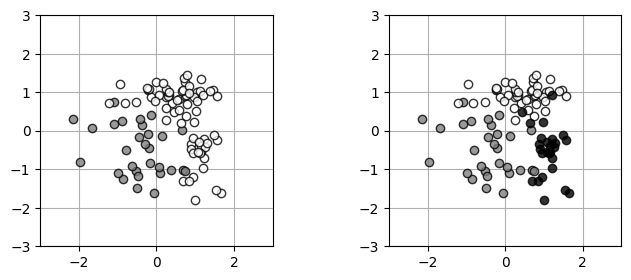

In [ ]:
# T2와 T3의 도식화

def show_data2(x, t):
  wk, K = t.shape
  c = [[.5, .5, .5], [1,1,1], [0,0,0]]
  for k in range(K):
    plt.plot(x[t[:, k] == 1,0], x[t[:,k] == 1,1],
             linestyle = 'none', markeredgecolor = 'black',
             marker = 'o', color=c[k], alpha= 0.8)
    plt.grid(True)

# 메인
plt.figure(figsize= (7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

- 로지스틱 회귀 모델

$$ y = σ(a) $$

a의 입력 총합식은 아래와 같음

$$ a = w_0x_0 + w_1x_1 + w_2 $$

이번 모델의 출력 y는 클래스가 0인 확률을 근사하는 것으로 하며, 모델 매개 변수가 하나 증가하여 w_0, w_1, w_2의 세가지이다.

2차원 입력 2클래스 분류의 로지스틱 회귀 모델에서 입력이 있을 때, 입력총합적으로하여 출력적으로 t=0일 때는 $$ y = σ(a) = \frac{1}{1 + exp(-a_n)} $$

t = 1일 확률을 근사할 때는 1-y로 나오게 된다.


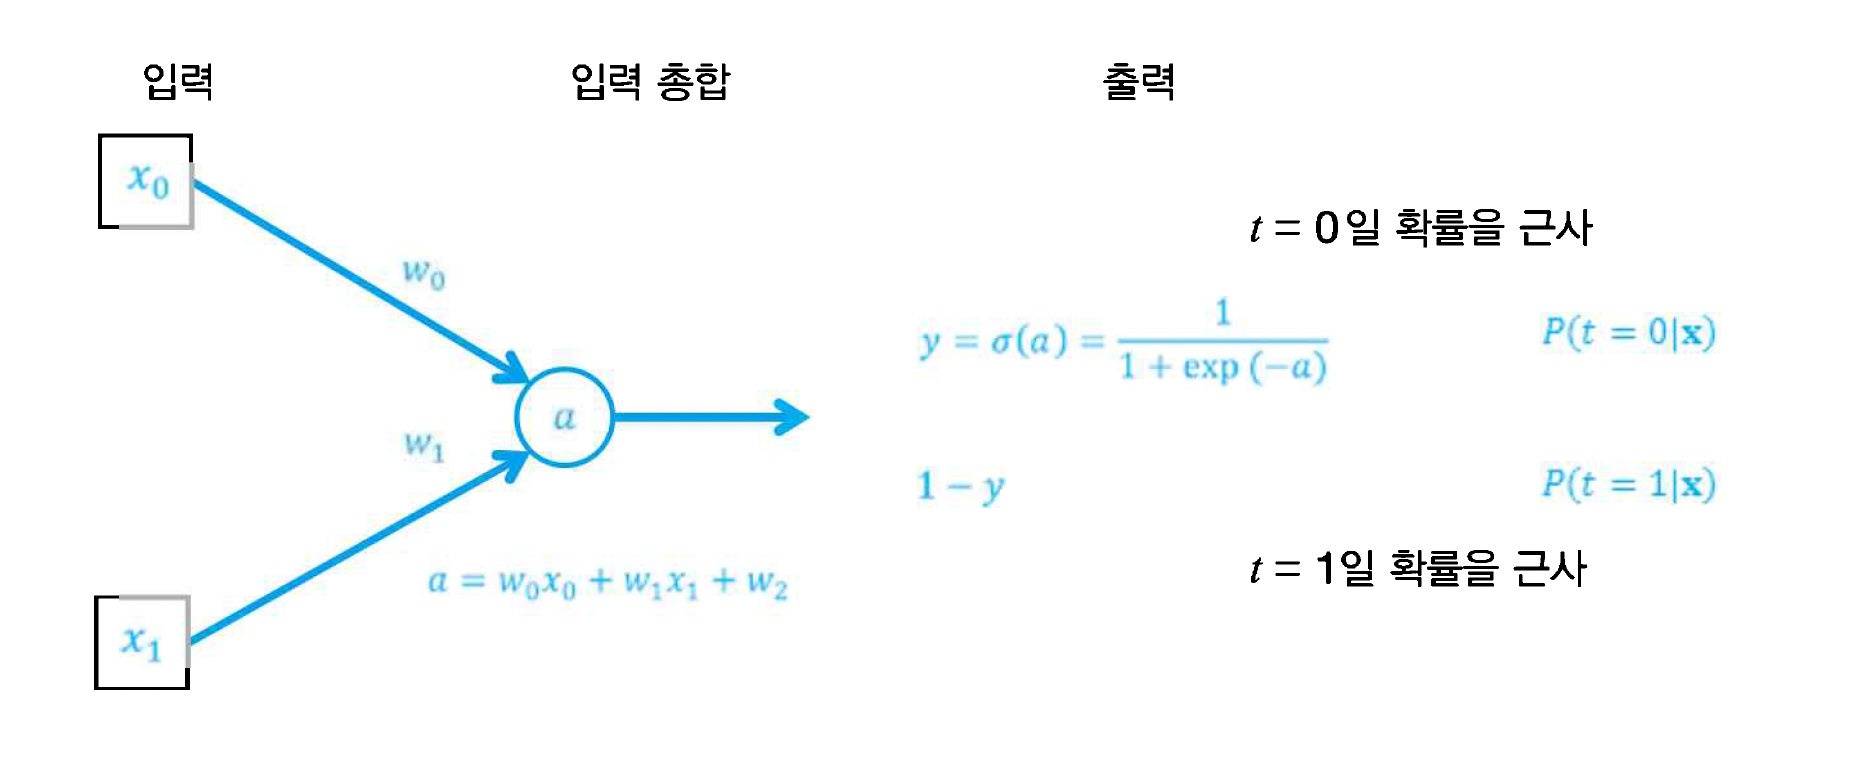

In [ ]:
# 로지스틱 회귀 모델 정의

def logistic2(x0, x1, w):
  y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
  return y

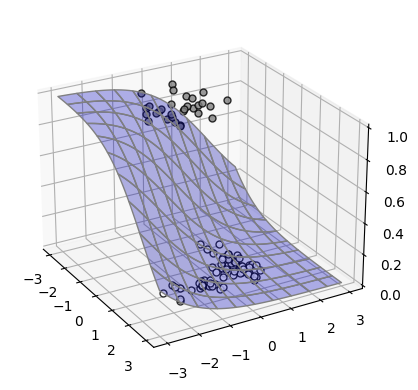

In [ ]:
# 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시했을 때

# 모델 3D 표시

from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
  xn = 50
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)


def show_data2_3d(ax, x ,t):
  c = [[.5, .5, .5], [1, 1, 1]]
  for i in range(2):
    ax.plot(x[t[:,i] == 1, 0], x[t[:,i] == 1,1], 1-i, marker='o', color=c[i], markeredgecolor='black', linestyle='none', markersize=5, alpha=0.8)
  Ax.view_init(elev=25, azim=-30)

# test
Ax = plt.subplot(1, 1, 1, projection='3d')
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

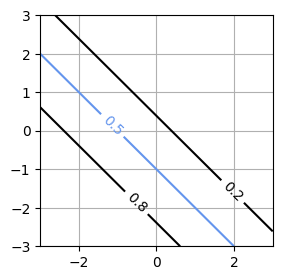

In [ ]:
# 모델 등고선 2D 표시

def show_contour_logistic2(w):
  # 매개 변수의 분할 수
  xn = 30
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  cont = plt.contour(xx0, xx1, y, levels = (0.2, 0.5, 0.8), colors = ['k', 'cornflowerblue', 'k'])
  cont.clabel(fmt='%1.1f', fontsize=10)
  plt.grid(True)

# test

plt.figure(figsize=(3,3))
W = [-1, -1, -1]
show_contour_logistic2(W)

평균 교차 엔트로피 오차 함수는 아래의 식을 사용함

$$ E(w) = -\frac{1}{N}logP(T|X) = -\frac{1}{N}\sum_{n=0}^{N-1}(t_nlogy_n + (1-t_n)log(1-y_n)) $$

여기서의 데이터베이스는 1-of-k 부호화를 사용하는데, 2클래스 분류 문제이므로 T의 0열째 t_n0을 t_n으로 두고, 1이면 클래스0, 0이면 클래스 1로 처리가 가능하다.

In [ ]:
# 크로스 엔트로피 오차를 계산하는 함수

def cee_logistic2(w, x ,t):
  X_n = x.shape[0]
  y = logistic2(x[:, 0], x[:, 1], w)
  cee = 0
  for n in range(len(y)):
    cee = cee - (t[n,0] * np.log(y[n]) + (1-t[n,0]) * np.log(1- y[n]))
  cee = cee /X_n
  return cee

매개 변수의 편미분을 구하면 아래와 같음.

$$ \frac{\partial E}{\partial w_0} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_0 $$

$$ \frac{\partial E}{\partial w_1} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_1 $$

$$ \frac{\partial E}{\partial w_2} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)$$

In [ ]:
# 편미분을 계산하는 함수를 정의 -> 실행하면 W = [-1, -1, -1]의 경우 편미분값이 반환된다.

# 크로스 엔트로피 오차의 미분

def dcee_logistic2(w,x,t):
  X_n = x.shape[0]
  y = logistic2(x[:,0], x[:,1], w)
  dcee = np.zeros(3)
  for n in range(len(y)):
    dcee[0] = dcee[0]+ (y[n] - t[n,0]) * x[n,0]
    dcee[1] = dcee[1]+ (y[n] - t[n,0]) * x[n,1]
    dcee[2] = dcee[2]+ (y[n] - t[n,0])
  dcee = dcee / X_n
  return dcee

# test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)


array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1= -2.54, w2 = -0.28
CEE = 0.22


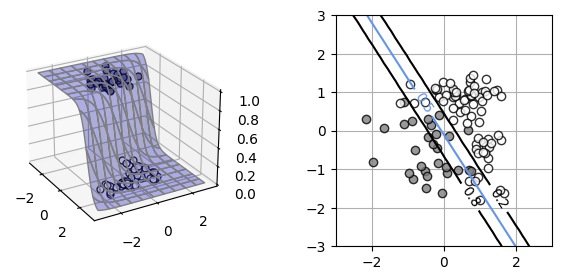

In [ ]:
# 평균 교차 엔트로피 오차가 최소가 되도록 로지스틱 회귀 모델의 매개변수를 구함

from scipy.optimize import minimize

def fit_logistic2(w_init, x, t):
  res = minimize(cee_logistic2, w_init, args=(x,t),
                 jac = dcee_logistic2, method="CG")
  return res.x

# 메인

plt.figure(1, figsize=(7,3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1= {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax,W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X ,T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

minimize()에 미분 함수도 전달하여 켤레 기울기법으로 매개 변수를 구함.

위의 오른쪽 그림을 보면 분포를 분리하는 곳에서 결정경계가 그려졌다고 볼 수 있다.

로지스틱 회귀 모델의 시그모이드 함수의 내용은 면 모델이며, 이 면은 시그모이드 함수에 의해 0과 1의 사이에 들어가는 것으로 생각할 수 있다.

중요한 점은 결정 경계는 반드시 직선이 된다는 점이다.

## 6.3 2차원 입력 3클래스 분류

- 3클래스 분류 로지스틱 회귀 모델

3클래스 이상의 분류로 들어갈 경우 소프트맥스 함수를 통한 모델의 출력으로 대응이 가능하다.

<div></div>

ex) 3클래스 분류문제인 경우 입력 총합 a_k(k = 0,1,2)를 고려함
$$ a_k = w_{k0}x0 + w_{k1}x1 + w_{k2} (k = 0,1,2) $$

w_ki는 입력 x_i에서 클래스 k의 입력 총합을 조절하는 매개 변수이다.

항상 1의 값을 갖는 세 번쨰 입력 x_2 = 1를 가정하면 아래와 같다

$$ a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}x_2 = \sum_{i=0}^Dw_{ki}x_i (k = 0, 1, 2)   $$

여기서 입력 총합을 소프트 맥수 함수에 입력하는 것을 생각하며, 입력 총합 지수 함수 exp(a_k)를 고려하여 이 지수 함수를 모든 클래스에 합한 것을 u로 한다.

$$ u = exp(a_0) + exp(a_1) + exp(a_2) = \sum_{k=0}^{K-1}exp(a_k) $$

K는 분류할 클래스의 수를 나타내며 K = 3으로 가정한다. 또한 소프트 맥스 함수의 출력은 u를 사용하여 아래와 같이 표시한다.

$$ y_k = \frac{exp(a_k)}{u} (k= 0, 1, 2) $$

모델의 입력은 x = [x_0, x_1, x_2]이지만, x_2는 항상 1의 더미 입력이다.

이 입력에 대한 출력은 y = [y_0, y_1, y_2]로 항상 y_0 + y_1 + y_2 = 1이 보장된다.

모델의 매개 변수는 w_ki(k= 0,1,2, i= 0,1,2,)로, 정리하여 행렬로 나타내면 아래와 같다.

$$W =
 \begin{pmatrix}
  W_{00} & W_{10} &  W_{20} \\
  W_{01} & W_{11} &  W_{21} \\
  W_{02} & W_{12} &  W_{22} \\
 \end{pmatrix}$$

<br><br/>
모델의 출력은 각 클래스에서 입력 x 가 속할 확률을 나타내도록 학습시킨다.

P(T|[1,0,0]|x)(class 0)

P(T|[0,1,0]|x)(class 1)

P(T|[0,0,1]|x)(class 2)

In [ ]:
# 3클래스용 로지스틱 회귀 모델

def logistic3(x0, x1, w):
  K = 3
  w = w.reshape((3,3))
  n = len(x1)
  y = np.zeros((n, K))
  for k in range(K):
    y[:, k] = np.exp(w[k,0] * x0 + w[k,1] * x1 + w[k,2])
  wk = np.sum(y, axis= 1)
  wk = y.T / wk
  y = wk.T
  return y

# test
W = np.array([1,2,3,4,5,6,7,8,9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

# 결과값으로 봤을 때 같은 라인의 요수(가로 줄의 수)를 더하면 1이 된다 --> softmax함수 사용

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


- 교차 엔트로피 오차

가능도는 모든 입력 데이터 x에 대해서 전체 클래스 데이터 T가 생성된 확률이다.<br></br>

한 입력 데이터 x에 주목하여 그 클래스가 0(T = [1,0,0])인 경우, 그 클래스가 생성된 확률은 아래와 같다

P(T= [1,0,0]|X) = y_0
<br></br>

클래스가 (T1 = [0 , 1, 0])인 경우, 그 확률은 아래와 같다.

P(T= [0,1,0]|X) = y_1<br></br>

이렇게 어떤 클래스에도 동일한 수식으로 표현하려면 아래의 식과 같이 된다.

$$ P(T|X) = y_0^{t0}y_1^{t1}y_2^{t2} $$<br></br>


예를 들어 클래스 1(T = [t_o,t_1,t_2] = [0,1,0])이라면 아래와 같이 y_1을 추출할 수 있다.

$$ P(T1 = [0 , 1, 0]|X) = y_0^0y_1^1y_2^0 = y_1 $$<br></br>

결과적으로 모든 N개의 데이터가 생성될 확률은 이 확률을 모든 데이터에 곱하면 되며,

$$P(T|X) = \prod_{n=0}^{N-1} P(t_n|X_n)= \prod_{n=0}^{N-1} y_{n0}^{t_{n0}}y_{n1}^{t_{n1}}y_{n2}^{t_{n2}}$$<br></br>

평균 교차 엔트로피 오차 함수는 가능도의 음의 대수의 평균이므로, 아래의 식으로 도출할 수 있다.

$$E(W) = -\frac{1}{N}logP(T|X) =-\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} P(t_n|x_n) = -\frac{1}{N}\displaystyle\sum_{n=0}^{N-1}\displaystyle\sum_{k=0}^{K-1} t_{nk}logy_{nk} $$

In [ ]:
# 교차 엔트로피 오차

def cee_logistic3(w, x, t):
  X_n = x.shape[0]
  y = logistic3(x[:, 0], x[:, 1], w)
  cee = 0
  N, K = y.shape

  for n in range(N):
    for k in range(K):
      cee = cee- (t[n,k] * np.log(y[n, k]))
  cee = cee / X_n
  return cee

# test (9개 요수의 배열 W와 X, T3를 인수로 스칼라 값을 출력함.)
W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W, X ,T3)

3.9824582404787288

- 경사 하강법에 의한 해

해당 챕터에서는 경사하강법과 소프트맥스 함수의 미분 계산을 포함하여 계산한 값만 확인함.


In [ ]:
# 교차 엔트로피 오차의 미분

def dcee_logistic3(w, x, t):
  X_n = x.shape[0]
  y = logistic3(x[:,0], x[:,1], w)
  dcee = np.zeros((3,3))
  N, K = y.shape
  for n in range(N):
    for k in range(K):
      dcee[k, :] = dcee[k, :] - (t[n, k] - y[n,k]) * np.r_[x[n, :], 1]
  dcee = dcee /X_n
  return dcee.reshape(-1)

# test

W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W, X, T3)

# 출력은 aE/ aw에 대응한 요소 수 9개의 배열이며, 이를 minimize에 전달하여 매개 변수 검색을 수행하는 함수를 만든다.

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [ ]:
# 매개 변수 검색

def fit_logistic3(w_init, x, t):
  res = minimize(cee_logistic3, w_init, args = (x, t),
                 jac= dcee_logistic3, method="CG")
  return res.x


# 모델 등고선 2D 표시

def show_contour_logistic3(w):
  xn = 30
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)

  xx0, xx1 = np.meshgrid(x0, x1)
  y = np.zeros((xn, xn, 3))
  for i in range(xn):
      wk = logistic3(xx0[:, i], xx1[:, i], w)
      for j in range(3):
          y[:, i, j] = wk[:, j]

  for j in range(3):
      cont = plt.contour(xx0, xx1, y[:, :, j],
                       levels=(0.5, 0.9),
                       colors=['cornflowerblue', 'k'])
      cont.clabel(fmt='%1.1f', fontsize=9)

  plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


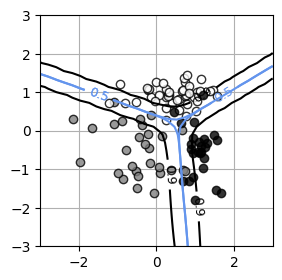

In [ ]:
# 메인

W_init = np.zeros((3, 3))
W_init = W_init.flatten()
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)), 2))
cee = cee_logistic3(W, X ,T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

scipy의 version상 오류로 dimension오류가 나옴

-> flatten 함수를 사용

< 참고 >

https://github.com/aristoteleo/dynamo-release/issues/578

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html